# How To Predicting Used Car Prices?
Determining whether the listed price of a used car is a challenging task, for many factors that drive a used vehicle’s price on the market. The focus of this project is developing machine learning models that can accurately predict the price of a used car based on its features

# Tools
There are tools that will be used to achieve the goal of this study, such as: ``` matplotlib, pandas, ``` for discovering the data and train a model. The work will be done through Jupyter notebook.

# Import library

In [22]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
plt.style.use('ggplot')

In [2]:
## Uploade the Dateset From local (UsedCarsSA_UNClean_EN) The Data set is 
## Downloaded From (https://www.kaggle.com/turkibintalib/saudi-arabia-used-cars-dataset)

df = pd.read_csv("UsedCarsSA_UNClean_EN.csv")

# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


In [5]:
data_Clean = df.drop('Link', axis=1)

In [6]:
data_Clean 

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False
8245,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,Used,260,Najran,Negotiable,True
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,Used,18500,Aseer,22000,False


In [9]:
data_Clean.isnull().sum()

Make              0
Type              0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2266
Fuel_Type         0
Gear_Type        74
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

In [12]:
#Filling The missing Value in Origin and Options and Gear_Type  with the (method 'bfill')
#Origin           95
#Options         109
#Gear_Type        74
data_Clean['Origin'].fillna(method='bfill', inplace=True)
data_Clean['Options'].fillna(method='bfill',inplace=True)
data_Clean['Gear_Type'].fillna(method='bfill',inplace=True)
## Show The NULL 
data_Clean.isnull().sum()

Make              0
Type              0
Year              0
Origin            0
Color             0
Options           0
Engine_Size    2266
Fuel_Type         0
Gear_Type         0
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

In [13]:
### Filling The missing Value in Engine_Size with the std() 

data_Clean.fillna(value=data_Clean['Engine_Size'].std(),inplace=True)
data_Clean.isnull().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Condition      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [14]:
##The price column contains some String values and we need to process them
## and replace all the values that contain negotiable with the NAN
data_Clean['Price'].replace('Negotiable', np.NaN ,inplace=True)

In [16]:
data_Clean.isnull().sum()

Make              0
Type              0
Year              0
Origin            0
Color             0
Options           0
Engine_Size       0
Fuel_Type         0
Gear_Type         0
Condition         0
Mileage           0
Region            0
Price          2596
Negotiable        0
dtype: int64

In [19]:
## Now we have NAN in 2596 rows, and because it is difficult to replace the average or mein or std in the price
## because it well effect on the question, we delete all the rows that contain the values in the price column
data_Clean.dropna(how='any',inplace=True)
data_Clean.isnull().sum()
data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         5652 non-null   object 
 1   Type         5652 non-null   object 
 2   Year         5652 non-null   int64  
 3   Origin       5652 non-null   object 
 4   Color        5652 non-null   object 
 5   Options      5652 non-null   object 
 6   Engine_Size  5652 non-null   float64
 7   Fuel_Type    5652 non-null   object 
 8   Gear_Type    5652 non-null   object 
 9   Condition    5652 non-null   object 
 10  Mileage      5652 non-null   int64  
 11  Region       5652 non-null   object 
 12  Price        5652 non-null   object 
 13  Negotiable   5652 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 623.7+ KB


In [21]:
## 12  Price        5652 non-null   object  her the price is (object) we need To Convert it to (float)
data_Clean['Price'] = data_Clean['Price'].astype(float)
data_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         5652 non-null   object 
 1   Type         5652 non-null   object 
 2   Year         5652 non-null   int64  
 3   Origin       5652 non-null   object 
 4   Color        5652 non-null   object 
 5   Options      5652 non-null   object 
 6   Engine_Size  5652 non-null   float64
 7   Fuel_Type    5652 non-null   object 
 8   Gear_Type    5652 non-null   object 
 9   Condition    5652 non-null   object 
 10  Mileage      5652 non-null   int64  
 11  Region       5652 non-null   object 
 12  Price        5652 non-null   float64
 13  Negotiable   5652 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 623.7+ KB


# Visualization And Data Analysis
..
..
..



<AxesSubplot:title={'center':'Fuel_Type Vs Price'}, xlabel='Fuel_Type', ylabel='Price'>

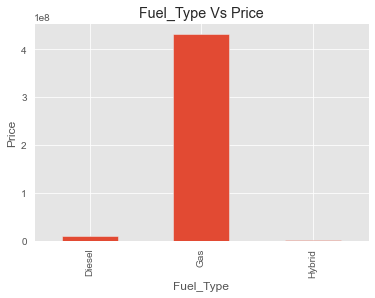

In [27]:
data_Clean['Fuel_Type'].value_counts()
var = data_Clean.groupby('Fuel_Type').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Fuel_Type')
ax1.set_ylabel('Price')
ax1.set_title("Fuel_Type Vs Price")
var.plot(kind='bar')

<AxesSubplot:title={'center':'Make Vs Price'}, xlabel='Make', ylabel='Increase In price'>

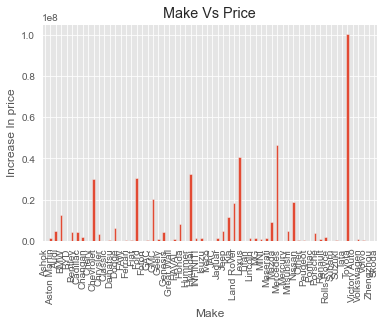

In [28]:
data_Clean['Make'].value_counts()
var = data_Clean.groupby('Make').Price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Make')
ax1.set_ylabel('Increase In price')
ax1.set_title("Make Vs Price")
var.plot(kind='bar')

<AxesSubplot:title={'center':'Type Vs Price'}, xlabel='Type', ylabel='Increase In price'>

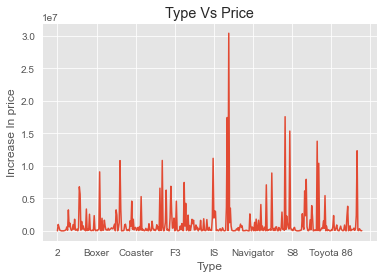

In [29]:
data_Clean['Type'].value_counts()
var = data_Clean.groupby('Type').Price.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Type Of Car')
ax1.set_ylabel('Increase In price')
ax1.set_title("Type Vs Price")
var.plot(kind='line')

<AxesSubplot:title={'center':'Mileage Vs Price'}, xlabel='Mileage', ylabel='Increase In price'>

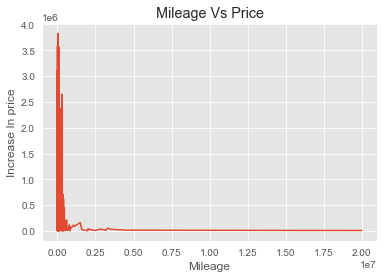

In [32]:
data_Clean['Mileage'].value_counts()
var = data_Clean.groupby('Mileage').Price.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Mileage Of Car')
ax1.set_ylabel('Increase In price')
ax1.set_title("Mileage Vs Price")
var.plot(kind='line')

<AxesSubplot:title={'center':'Year Vs Price'}, xlabel='Year', ylabel='Increase In price'>

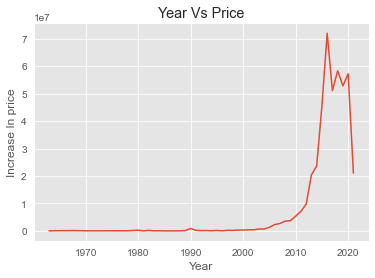

In [31]:
data_Clean['Year'].value_counts()
var = data_Clean.groupby('Year').Price.sum() 
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Year Of Car')
ax1.set_ylabel('Increase In price')
ax1.set_title("Year Vs Price")
var.plot(kind='line')

In [38]:
# sign data_Clean To test_df
test_df = data_Clean
test_df.info()
#encoding the categorical Data by 0 - 1  - 2 and Drop unnecessary columns
# (Make','Origin','Color','Condition','Region','Negotiable','Car_Group)
test_df.Options.unique()
test_df.replace({'Options':{'Full':0,'Semi Full':1,'Standard':2}}, inplace=True)
test_df.Fuel_Type.unique()
test_df.replace({'Fuel_Type':{'Gas':0,'Diesel':2,'Hybrid':1}}, inplace=True)
test_df.Gear_Type.unique()
test_df.replace({'Gear_Type':{'Automatic':0,'Manual':1}}, inplace=True)
test_df.drop(['Make','Origin','Color','Condition','Region','Negotiable'], axis = 1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5652 entries, 0 to 8247
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5652 non-null   object 
 1   Year         5652 non-null   int64  
 2   Options      5652 non-null   int64  
 3   Engine_Size  5652 non-null   float64
 4   Fuel_Type    5652 non-null   int64  
 5   Gear_Type    5652 non-null   int64  
 6   Mileage      5652 non-null   int64  
 7   Price        5652 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 397.4+ KB
